In [596]:
import os 
import glob
import numpy as np
import pandas as pd
import importlib as imp
from datetime import datetime
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
pd.options.display.max_columns = 100

In [4]:
benchmarks = glob.glob('data/*')
benchmarks

['data\\tai100a',
 'data\\tai20a',
 'data\\tai40a',
 'data\\tai60a',
 'data\\tai80a']


Форма отчетности: <br>

Вы присылаете мне код алгоритмов и небольшой отчет. Пожалуйста прикрепляте код в отдельном исполняймом файле, не засовывайте в отчет. Работать можно в группах не более 3-х человек. В отчете должны быть таблички со скоростью и для конкретного алгоритма на конкретном наборе данных + ответ каждого алгоритма.

**Важно:** сделайте так же файлики с ответами. Имя файлика - Tai20a.sol, Tai40a.sol  и т.п. Формат файлика с ответами:

14 13 5... - значит завод 14 помещаем на 1 локацию, 13 на 2, 5 на 3 и т.п. Разделитель пробел.

In [613]:
from utils import tools
tools = imp.reload(tools)
best__known_cost = {'data\\tai20a': 703482,
                    'data\\tai40a': 3139370,
                    'data\\tai60a': 7205962,
                    'data\\tai80a': 13515450,
                    'data\\tai100a': 21054656,
                    }
i = 3
problem = tools.get_problem_dct(benchmarks[i])
solution = np.arange(problem['n'])
solution = np.random.permutation(solution)
cur_cost = tools.compute_solution(problem, solution)
print('### Benchmark: ```{}``` has **{}** items and locations<br>'.format(benchmarks[i][5:], problem['n']))
print(' - Best known solution: *{}* <br>'.format(best__known_cost[benchmarks[i]]))
print(' - Initial solution cost: *{}* <br>'.format(cur_cost))

### Benchmark: ```tai60a``` has **60** items and locations<br>
 - Best known solution: *7205962* <br>
 - Initial solution cost: *8471274* <br>


In [594]:
%%time
local_search = imp.reload(local_search)

params = dict(solution=solution,
              method='first-delta-improvement',
              n_iter=100,
              verbose=True)
alg = local_search.LocalSearch(problem)
alg.set_params(params)
_ = alg.solve()

Start cost 873730


No better solutions, stoping...

End cost 755488
Wall time: 59.4 ms


Start cost: 8471274



End cost: 7750048
Wall time: 23 s


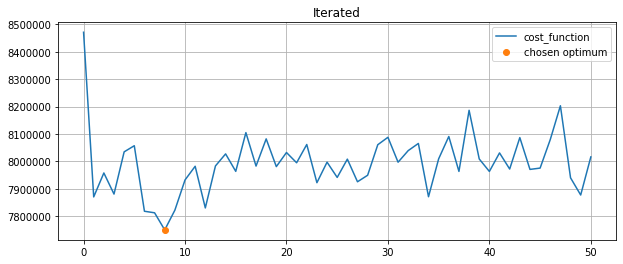

In [617]:
%%time
iterated_local_search = imp.reload(iterated_local_search)
params = dict(solution=solution,
              method='first-delta-improvement',
              n_iter_ls=50,
              n_iter=50,
              verbose=True)
alg = iterated_local_search.Iterated(problem)
alg.set_params(params)
alg.refresh_params()
alg_solution = alg.solve()
history = alg.get_history()
_=plt.savefig('img/iterated_tai20a.png')

 51%|███████████████████████████████████████▌                                      | 76/150 [00:15<00:16,  4.53it/s]

No better solutions, stoping...
End cost: 7665252
Penalties: [0 1 1 0 0 0 0 1 1 2 3 0 1 0 1 0 1 2 2 2 1 3 3 0 2 0 4 0 4 2 0 0 4 0 3 3 0
 0 1 2 1 4 2 0 5 4 1 0 2 3 0 1 2 1 0 0 1 1 1 0]
Wall time: 16.2 s


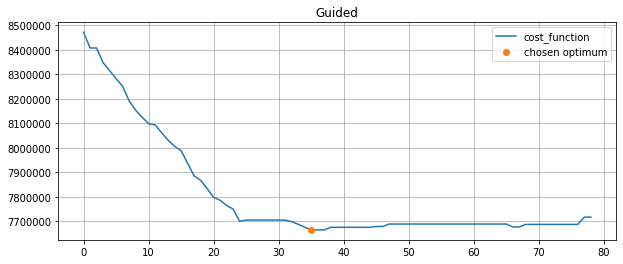

In [616]:
%%time
local_search = imp.reload(local_search)
guided_local_search = imp.reload(guided_local_search)
params = dict(solution=solution,
              method='first-delta-improvement',
              n_iter=5,
              n_epoch=150,
              mu=5000,
              patience=50,
              verbose=True)
alg = guided_local_search.Guided(problem)
alg.set_params(params)
alg.refresh_params()
alg_solution = alg.solve()
history = alg.get_history()
_=plt.savefig('img/guided_tai20a.png')
print('Penalties: {}'.format(alg.penalty.sum(axis=0)))
filename = 'T'+benchmarks[i][6:]+'.sol'
np.savetxt('solution/guided/'+filename, alg_solution.reshape(1,alg_solution.shape[0]), fmt='%d')

In [581]:
%%time
from algorithm import local_search, iterated_local_search, guided_local_search
tools   = imp.reload(tools)
local_search = imp.reload(local_search)
iterated_local_search = imp.reload(iterated_local_search)
guided_local_search = imp.reload(guided_local_search)


ls_base = dict(method='first-delta-improvement',
               n_iter=50,
               verbose=False)
ls_params = {'data\\tai20a': ls_base ,
             'data\\tai40a': ls_base,
             'data\\tai60a': ls_base,
             'data\\tai80a': ls_base,
             'data\\tai100a': ls_base}

iterated_base = dict(method='first-delta-improvement',
                     n_iter_ls=50,
                     n_iter=50,
                     verbose=False)
iterated_params = {'data\\tai20a': iterated_base ,
                   'data\\tai40a': iterated_base,
                   'data\\tai60a': iterated_base,
                   'data\\tai80a': iterated_base,
                   'data\\tai100a': iterated_base}
guided_base20 = dict(method='first-delta-improvement',
                   n_iter=5,
                   n_epoch=150,
                   mu=500,
                   patience=5,
                   verbose=False)
guided_base40 = dict(method='first-delta-improvement',
                   n_iter=5,
                   n_epoch=150,
                   mu=500,
                   patience=5,
                   verbose=False)
guided_base60 = dict(method='first-delta-improvement',
                     n_iter=5,
                     n_epoch=150,
                     mu=1000,
                     patience=5,
                     verbose=False)
guided_base80 = dict(method='first-delta-improvement',
                     n_iter=5,
                     n_epoch=150,
                     mu=1000,
                     patience=5,
                     verbose=False)
guided_base100 = dict(method='first-delta-improvement',
                      n_iter=4,
                      n_epoch=150,
                      mu=2000,
                      patience=5,
                      verbose=False)
guided_params = {  'data\\tai20a': guided_base80 ,
                   'data\\tai40a': guided_base80,
                   'data\\tai60a': guided_base80,
                   'data\\tai80a': guided_base80,
                   'data\\tai100a': guided_base80}


for i in [1,2,3, 4, 0]:
    problem = tools.get_problem_dct(benchmarks[i])
    start_solution = np.random.permutation(np.arange(problem['n']))
    cur_cost = tools.compute_solution(problem, start_solution)
    print('\n---\n')
    print('### Benchmark: ```{}``` has **{}** items and locations<br>'.format(benchmarks[i][5:], problem['n']))
    print(' - Best known solution cost: *{}* <br>'.format(best__known_cost[benchmarks[i]]))
    print(' - Initial solution cost: *{}* <br>'.format(cur_cost))
 
    # local search
    alg = local_search.LocalSearch(problem)
    dct_solution = {'solution': start_solution}
    params = dict(ls_params[benchmarks[i]], **dct_solution)
    alg.set_params(params)
    start_time = datetime.now()
    _ = alg.solve()
    end_time = datetime.now() - start_time
    work_str = ' ( exec time ```{}``` seconds)'.format(round(end_time.total_seconds(),2))
    alg_cost = tools.compute_solution(problem,alg.solution)
    print('  - **Local Search** optimal cost **{}**'.format(alg_cost)+work_str)
    filename = 'T'+benchmarks[i][6:]+'.sol'
    np.savetxt('solution/local_search/'+filename, alg.solution.reshape(1,alg.solution.shape[0]), fmt='%d')
    
    # iterated local search
    alg = iterated_local_search.Iterated(problem)
    dct_solution = {'solution': start_solution}
    params = dict(iterated_params[benchmarks[i]], **dct_solution)
    alg.set_params(params)
    alg.refresh_params()
    start_time = datetime.now()
    _ = alg.solve()
    end_time = datetime.now() - start_time
    work_str = ' ( exec time ```{}``` seconds)'.format(round(end_time.total_seconds(),2))
    alg_cost = tools.compute_solution(problem, alg.solution)
    print('  - **Iterated Local Search** optimal cost **{}**'.format(alg_cost)+work_str)
    filename = 'T'+benchmarks[i][6:]+'.sol'
    np.savetxt('solution/iterated/'+filename, alg.solution.reshape(1,alg.solution.shape[0]), fmt='%d')

    # guided local search
    alg = guided_local_search.Guided(problem)
    dct_solution = {'solution': start_solution}
    params = dict(guided_params[benchmarks[i]], **dct_solution)
    alg.set_params(params)
    alg.refresh_params()
    start_time = datetime.now()
    _ = alg.solve()
    end_time = datetime.now() - start_time
    work_str = ' ( exec time ```{}``` seconds)'.format(round(end_time.total_seconds(),2))
    alg_cost = tools.compute_solution(problem, alg.solution)
    print('  - **Guided Local Search** optimal cost **{}**'.format(alg_cost)+work_str)
    filename = 'T'+benchmarks[i][6:]+'.sol'
    np.savetxt('solution/guided/'+filename, alg.solution.reshape(1,alg.solution.shape[0]), fmt='%d')


---

### Benchmark: ```tai20a``` has **20** items and locations<br>
 - Best known solution cost: *703482* <br>
 - Initial solution cost: *873908* <br>
  - **Local Search** optimal cost **747858** ( exec time ```0.06``` seconds)
  - **Iterated Local Search** optimal cost **742752** ( exec time ```2.92``` seconds)
  - **Guided Local Search** optimal cost **747858** ( exec time ```0.19``` seconds)

---

### Benchmark: ```tai40a``` has **40** items and locations<br>
 - Best known solution cost: *3139370* <br>
 - Initial solution cost: *3853396* <br>
  - **Local Search** optimal cost **3481496** ( exec time ```0.16``` seconds)
  - **Iterated Local Search** optimal cost **3361050** ( exec time ```12.22``` seconds)
  - **Guided Local Search** optimal cost **3325712** ( exec time ```1.46``` seconds)

---

### Benchmark: ```tai60a``` has **60** items and locations<br>
 - Best known solution cost: *7205962* <br>
 - Initial solution cost: *8484364* <br>
  - **Local Search** optimal cost **795911

In [557]:
%%time
tools   = imp.reload(tools)
local_search = imp.reload(local_search)
iterated_local_search = imp.reload(iterated_local_search)
guided_local_search = imp.reload(guided_local_search)


guided_params = {  'data\\tai20a': guided_base20 ,
                   'data\\tai40a': guided_base40,
                   'data\\tai60a': guided_base60,
                   'data\\tai80a': guided_base80,
                   'data\\tai100a': guided_base100}

stat_dct = {'benchmark': [],
            'best_known_cost': [],
            'start_cost': [],
            'algorithm': [],
            'alg_cost': [],
            'exec_time': []}

n_observations = 3
for observation in tqdm(range(n_observations), position=0):
    for i in [1,2,3, 4, 0]:
        problem = tools.get_problem_dct(benchmarks[i])
        start_solution = np.random.permutation(np.arange(problem['n']))
        cur_cost = tools.compute_solution(problem, start_solution)

        # local search
        alg = local_search.LocalSearch(problem)
        dct_solution = {'solution': start_solution}
        params = dict(ls_params[benchmarks[i]], **dct_solution)
        alg.set_params(params)
        start_time = datetime.now()
        _ = alg.solve()
        end_time = datetime.now() - start_time
        alg_cost = tools.compute_solution(problem,alg.solution)
        stat_dct['benchmark'] += [benchmarks[i]]
        stat_dct['best_known_cost'] += [best__known_cost[benchmarks[i]]]
        stat_dct['start_cost'] += [cur_cost]
        stat_dct['algorithm'] += [alg.name]
        stat_dct['alg_cost'] += [alg_cost]
        stat_dct['exec_time'] += [end_time.total_seconds()]

        # iterated local search
        alg = iterated_local_search.Iterated(problem)
        dct_solution = {'solution': start_solution}
        params = dict(iterated_params[benchmarks[i]], **dct_solution)
        alg.set_params(params)
        alg.refresh_params()
        start_time = datetime.now()
        _ = alg.solve()
        end_time = datetime.now() - start_time
        alg_cost = tools.compute_solution(problem, alg.solution)
        stat_dct['benchmark'] += [benchmarks[i]]
        stat_dct['best_known_cost'] += [best__known_cost[benchmarks[i]]]
        stat_dct['start_cost'] += [cur_cost]
        stat_dct['algorithm'] += [alg.name]
        stat_dct['alg_cost'] += [alg_cost]
        stat_dct['exec_time'] += [end_time.total_seconds()]

        # guided local search
        alg = guided_local_search.Guided(problem)
        dct_solution = {'solution': start_solution}
        params = dict(guided_params[benchmarks[i]], **dct_solution)
        alg.set_params(params)
        alg.refresh_params()
        start_time = datetime.now()
        _ = alg.solve()
        end_time = datetime.now() - start_time
        alg_cost = tools.compute_solution(problem, alg.solution)
        stat_dct['benchmark'] += [benchmarks[i]]
        stat_dct['best_known_cost'] += [best__known_cost[benchmarks[i]]]
        stat_dct['start_cost'] += [cur_cost]
        stat_dct['algorithm'] += [alg.name]
        stat_dct['alg_cost'] += [alg_cost]
        stat_dct['exec_time'] += [end_time.total_seconds()]

100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [08:07<00:00, 161.94s/it]


Wall time: 8min 7s


In [558]:
stat_df = pd.DataFrame.from_dict(stat_dct)

In [559]:
agg_stat = stat_df.groupby(['benchmark', 'best_known_cost','algorithm']).agg({'alg_cost': 'mean',
                                                                              'exec_time': 'mean'})

In [560]:
agg_stat['alg_cost'] = agg_stat['alg_cost'].astype('int') 
np.around(agg_stat, 1).reset_index()

,benchmark,best_known_cost,algorithm,alg_cost,exec_time
0,data\tai100a,21054656,Guided,22197873,22.3
1,data\tai100a,21054656,Iterated,23035250,50.2
2,data\tai100a,21054656,LocalSearch,23428402,1.0
3,data\tai20a,703482,Guided,749870,0.2
4,data\tai20a,703482,Iterated,731518,2.9
5,data\tai20a,703482,LocalSearch,763320,0.1
6,data\tai40a,3139370,Guided,3320935,1.5
7,data\tai40a,3139370,Iterated,3349834,12.5
8,data\tai40a,3139370,LocalSearch,3430242,0.2
9,data\tai60a,7205962,Guided,7683911,3.9


In [561]:
print(np.around(agg_stat, 1).reset_index().to_markdown())

|    | benchmark    |   best_known_cost | algorithm   |   alg_cost |   exec_time |
|---:|:-------------|------------------:|:------------|-----------:|------------:|
|  0 | data\tai100a |          21054656 | Guided      |   22197873 |        22.3 |
|  1 | data\tai100a |          21054656 | Iterated    |   23035250 |        50.2 |
|  2 | data\tai100a |          21054656 | LocalSearch |   23428402 |         1   |
|  3 | data\tai20a  |            703482 | Guided      |     749870 |         0.2 |
|  4 | data\tai20a  |            703482 | Iterated    |     731518 |         2.9 |
|  5 | data\tai20a  |            703482 | LocalSearch |     763320 |         0.1 |
|  6 | data\tai40a  |           3139370 | Guided      |    3320935 |         1.5 |
|  7 | data\tai40a  |           3139370 | Iterated    |    3349834 |        12.5 |
|  8 | data\tai40a  |           3139370 | LocalSearch |    3430242 |         0.2 |
|  9 | data\tai60a  |           7205962 | Guided      |    7683911 |         3.9 |
| 10

|    | benchmark    |   best_known_cost | algorithm   |         alg_cost |   exec_time |
|---:|:-------------|------------------:|:------------|-----------------:|------------:|
|  0 | data\tai100a |          21054656 | Guided      |      2.21858e+07 |        25.3 |
|  1 | data\tai100a |          21054656 | Iterated    |      2.30132e+07 |        51.8 |
|  2 | data\tai100a |          21054656 | LocalSearch |      2.27181e+07 |         4.9 |
|  3 | data\tai20a  |            703482 | Guided      | 743415           |         0.2 |
|  4 | data\tai20a  |            703482 | Iterated    | 736406           |         2.9 |
|  5 | data\tai20a  |            703482 | LocalSearch | 754977           |         0.1 |
|  6 | data\tai40a  |           3139370 | Guided      |      3.33719e+06 |         1.1 |
|  7 | data\tai40a  |           3139370 | Iterated    |      3.35139e+06 |        12.5 |
|  8 | data\tai40a  |           3139370 | LocalSearch |      3.40896e+06 |         0.5 |
|  9 | data\tai60a  |           7205962 | Guided      |      7.64602e+06 |         3.9 |
| 10 | data\tai60a  |           7205962 | Iterated    |      7.77692e+06 |        22.6 |
| 11 | data\tai60a  |           7205962 | LocalSearch |      7.80398e+06 |         1.4 |
| 12 | data\tai80a  |          13515450 | Guided      |      1.43291e+07 |         9.7 |
| 13 | data\tai80a  |          13515450 | Iterated    |      1.47066e+07 |        33.2 |
| 14 | data\tai80a  |          13515450 | LocalSearch |      1.45567e+07 |         2.5 |